In [ ]:
!pip install tensorflow pillow opencv-python
import tensorflow as tf
from keras.preprocessing.image import ImageDataGenerator
import numpy as np
from tensorflow.keras.preprocessing import image
import cv2
from PIL import Image
import matplotlib.pyplot as plt


In [ ]:
tf.__version__

In [ ]:
train_datagen = ImageDataGenerator(rescale=1./255,
                                   shear_range=0.2,
                                   zoom_range=0.2,
                                   horizontal_flip=True)
training_set = train_datagen.flow_from_directory('training set',
                                                 target_size=(64, 64),
                                                 batch_size=7,
                                                 class_mode='categorical') 

In [ ]:
test_datagen = ImageDataGenerator(rescale=1./255)
test_set = test_datagen.flow_from_directory('test-set',
                                            target_size=(64, 64),
                                            batch_size=7,
                                            class_mode='categorical')  # Changed to 'categorical'

In [12]:

# Initialising the CNN
cnn = tf.keras.models.Sequential()

# Convolution
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu', input_shape=[64, 64, 3]))

# Pooling
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Second convolutional layer
cnn.add(tf.keras.layers.Conv2D(filters=32, kernel_size=3, activation='relu'))
cnn.add(tf.keras.layers.MaxPool2D(pool_size=2, strides=2))

# Flattening
cnn.add(tf.keras.layers.Flatten())

# Full connection
cnn.add(tf.keras.layers.Dense(units=128, activation='relu'))

# Output layer - Updated for 10 classes
cnn.add(tf.keras.layers.Dense(units=10, activation='softmax'))  # Changed to 10 units for 10 classes

# Training the CNN

# Compiling CNN
cnn.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])  # Changed to 'categorical_crossentropy'

# Training and evaluating the CNN
cnn.fit(x=training_set, validation_data=test_set, epochs=8)



Found 1156 images belonging to 10 classes.
Found 295 images belonging to 10 classes.
Epoch 1/8


    pytz>=2011n
        ~~~~~~^


166/166 [==============================] - 4s 20ms/step - loss: 2.0926 - accuracy: 0.2500 - val_loss: 1.9921 - val_accuracy: 0.2237
Epoch 2/8
166/166 [==============================] - 3s 19ms/step - loss: 1.8225 - accuracy: 0.3434 - val_loss: 1.6657 - val_accuracy: 0.4373
Epoch 3/8
166/166 [==============================] - 4s 24ms/step - loss: 1.5768 - accuracy: 0.4524 - val_loss: 1.4062 - val_accuracy: 0.4915
Epoch 4/8
166/166 [==============================] - 6s 36ms/step - loss: 1.4002 - accuracy: 0.5190 - val_loss: 1.3034 - val_accuracy: 0.5729
Epoch 5/8
166/166 [==============================] - 6s 34ms/step - loss: 1.2500 - accuracy: 0.5779 - val_loss: 1.2099 - val_accuracy: 0.5864
Epoch 6/8
166/166 [==============================] - 7s 39ms/step - loss: 1.0900 - accuracy: 0.6280 - val_loss: 1.2368 - val_accuracy: 0.5932
Epoch 7/8
166/166 [==============================] - 6s 37ms/step - loss: 0.9614 - accuracy: 0.6661 - val_loss: 1.0894 - val_accuracy: 0.6203
Epoch 8/8
166/16

In [ ]:
face_cascade = cv2.CascadeClassifier(cv2.data.haarcascades + 'haarcascade_frontalface_default.xml')


test_image_path = 'test-set\Emma Stone\Emma Stone4_1783.jpg'
test_image = image.load_img(test_image_path, target_size=(64, 64))
original_image = cv2.imread(test_image_path)
test_image = image.img_to_array(test_image)
test_image = np.expand_dims(test_image, axis=0)
result = cnn.predict(test_image)

In [ ]:
class_labels = list(training_set.class_indices.keys())


predicted_class_index = np.argmax(result)
prediction = class_labels[predicted_class_index]  

In [ ]:
# Drawing green squares around detected faces and displaying the prediction
gray_image = cv2.cvtColor(original_image, cv2.COLOR_BGR2GRAY)
faces = face_cascade.detectMultiScale(gray_image, scaleFactor=1.1, minNeighbors=5, minSize=(30, 30))

for (x, y, w, h) in faces:
    cv2.rectangle(original_image, (x, y), (x + w, y + h), (0, 255, 0), thickness=2)
    cv2.putText(original_image, prediction, (x, y - 10), cv2.FONT_HERSHEY_SIMPLEX, 0.9, (0, 255, 0), thickness=2)

1/1 [==============================] - 0s 17ms/step


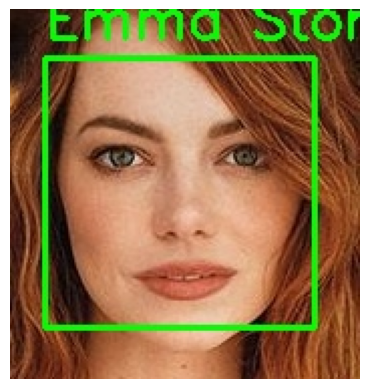

Prediction: Emma Stone
43/43 [==============================] - 0s 11ms/step - loss: 1.0943 - accuracy: 0.6000
Accuracy: 0.6000000238418579


In [11]:
output_image_path = 'prediction/test 3.jpg'
cv2.imwrite(output_image_path, original_image)

output_image = Image.open(output_image_path)
plt.imshow(output_image)
plt.axis('off')
plt.show()

print(f"Prediction: {prediction}")



In [ ]:
accuracy = cnn.evaluate(test_set)[1]
print('Accuracy:', accuracy)